In [17]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

## Parallel Simulation

In [21]:
#initializing params object
#params = Params.from_dict({**PARAMS_DICT, 'tau':150, th': 0.65, 'sigma':0.01})
params = Params.from_dict({**PARAMS_DICT, 'tau': 100, 'th':0.7, 'sigma':0.05})

#initializing simulation class
parsim = ParallelSimulation(params)

#simulation
stimulus = 500
K = 5.0
par_result = parsim.simulate(stimulus, K)

Timeouts 3
Stimulus: 500 , Production of trial 10 (blue): 560


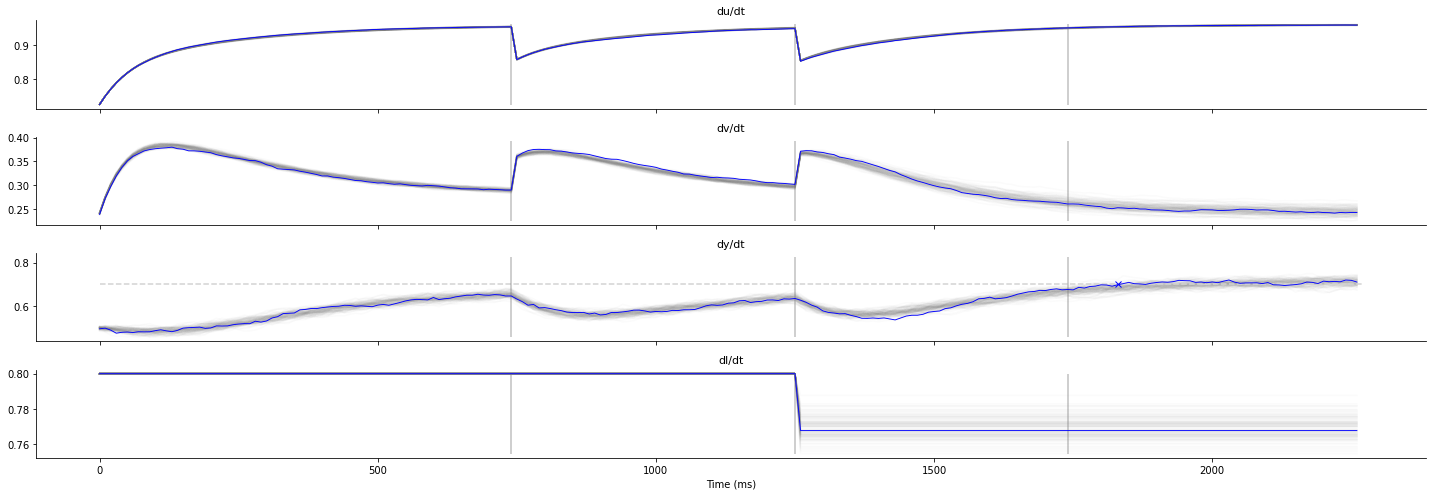

In [22]:
plot = SimulationPlot(par_result.create_simulation_plot_data())
alpha=0.03
plot.plot_trials(alpha)
plot.plot_example_trial(stimulus, 10)

In [23]:
#simulation
stimulus_range = [400,500,600,700,800]
K = 7.0
par_range_result = parsim.simulate_range(stimulus_range, K)

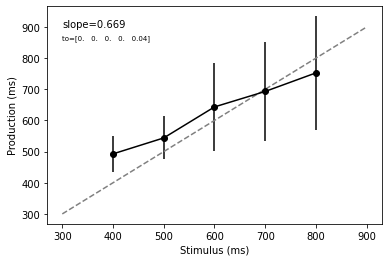

In [25]:
plot = BehavioralPlot(par_range_result.create_behavioral_plot_data())
plot.plot_behavior()

## Experiment Simulation

In [4]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

Timeouts 0


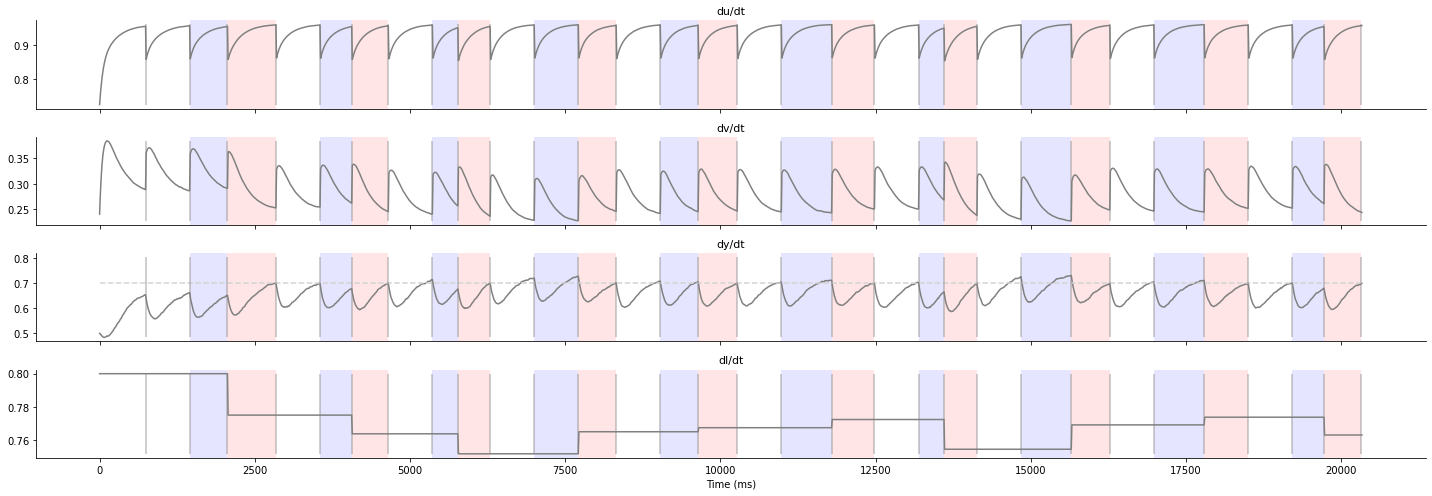

In [5]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 10, 'tau': 100, 'th':0.7, 'delay':700, 'sigma': 0.01})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K)

alpha = 1
# plot = SimulationPlot(exp_result.create_simulation_plot_data())
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

In [37]:
exp_result.timeout_index

[0]

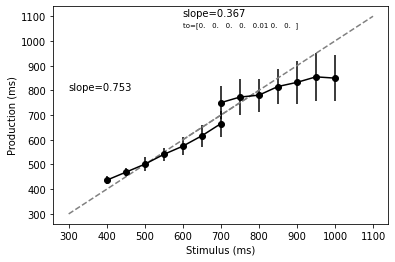

In [35]:
params = Params(ntrials=500, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
K = 8
exp_result = expsim.simulate(stimulus_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()


params = Params(ntrials=500, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
K = 4
exp_result = expsim.simulate(stimulus_long, K)
## get behavioral data
data = exp_result.create_behavioral_data()
## get plot data
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

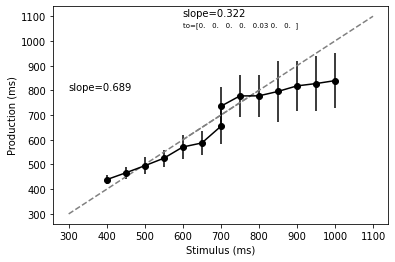

In [33]:
params = Params(ntrials=500, delay=700, tau=100, th=0.8)
expsim = ExperimentSimulation(params)
K = 14
exp_result = expsim.simulate(stimulus_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()


params = Params(ntrials=500, delay=700, tau=100, th=0.8)
expsim = ExperimentSimulation(params)
K = 8
exp_result = expsim.simulate(stimulus_long, K)
## get behavioral data
data = exp_result.create_behavioral_data()
## get plot data
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

# Exploring Parameter: K, $\tau$, $\sigma$, threshold, delay

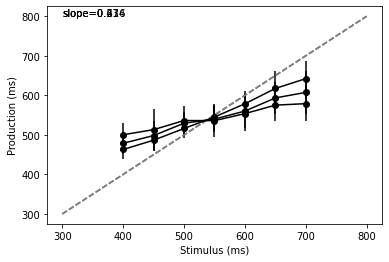

In [37]:
params = Params(ntrials=500, delay=700, tau=120, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 7.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 9.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

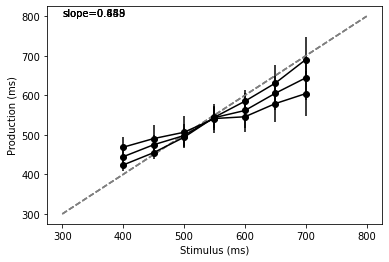

In [38]:
params = Params(ntrials=500, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 7.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 9.0
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

## Influence of initial I 

################ 0.6 ################
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
[ 4 30]
1: late timeout early crossing, 2: early timeout
################ 0.63 ################
late timeout no crossing
[ 9 20]
1: late timeout early crossing, 2: early timeout
late timeout no crossing
[ 6 23]
1: late timeout early crossing, 2: early timeout
[ 2 38]
1: late timeout early crossing, 2: early timeout
################ 0.65 ################
late timeout no crossing
late timeout no crossing
[ 4 31]
1: late timeout early crossing, 2: early timeout
################ 0.67 ################
[ 7 19]
1: late timeout early crossing, 2: early timeout
[ 8 20]
1: late timeout early crossing, 2: early timeout
[ 3 33]
1: late timeout early crossing, 2: early timeout
################ 0.7 ################
[ 3 28]
1: late timeout early crossing, 2: early timeout
################ 0.73 ################
################ 0.75 ################
################

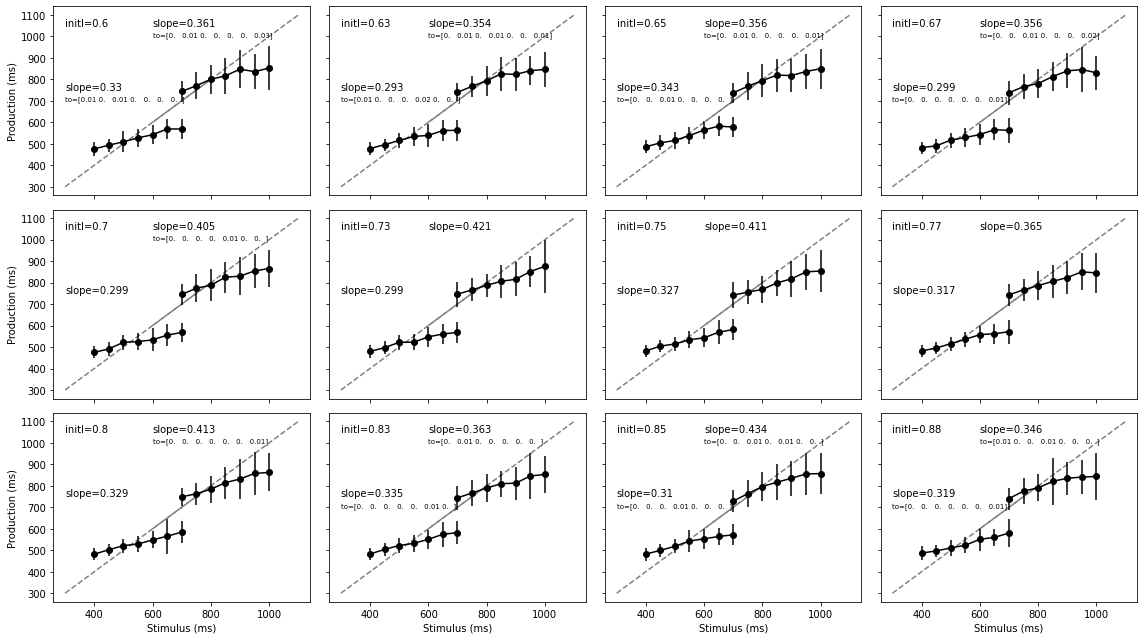

In [38]:
Iinit_lst = [0.6, 0.63, 0.65, 0.67, 0.7, 0.73, 0.75, 0.77, 0.8, 0.83, 0.85, 0.88]
K = 4
fig, ax = plt.subplots(3,4, figsize=(16,9), sharex=True, sharey=True)

i = 0
for Iinit in Iinit_lst:
    print('################', initI, '################')
    params = Params(ntrials=500, delay=700, tau=100, th=0.7, Iinit = Iinit)
    expsim = ExperimentSimulation(params)

    stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
    exp_result1 = expsim.simulate(stimulus_lst1, K)
    plot = exp_result1.create_behavioral_plot()
    plot.plot_behavior(ax.flatten()[i])

    stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
    exp_result2 = expsim.simulate(stimulus_lst2, K)
    plot = exp_result2.create_behavioral_plot()
    plot.plot_behavior(ax.flatten()[i])

    ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+50, 'initI='+str(Iinit))
    i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

plt.tight_layout()

## Parameter search 

# K & $\tau$ with th=0.8

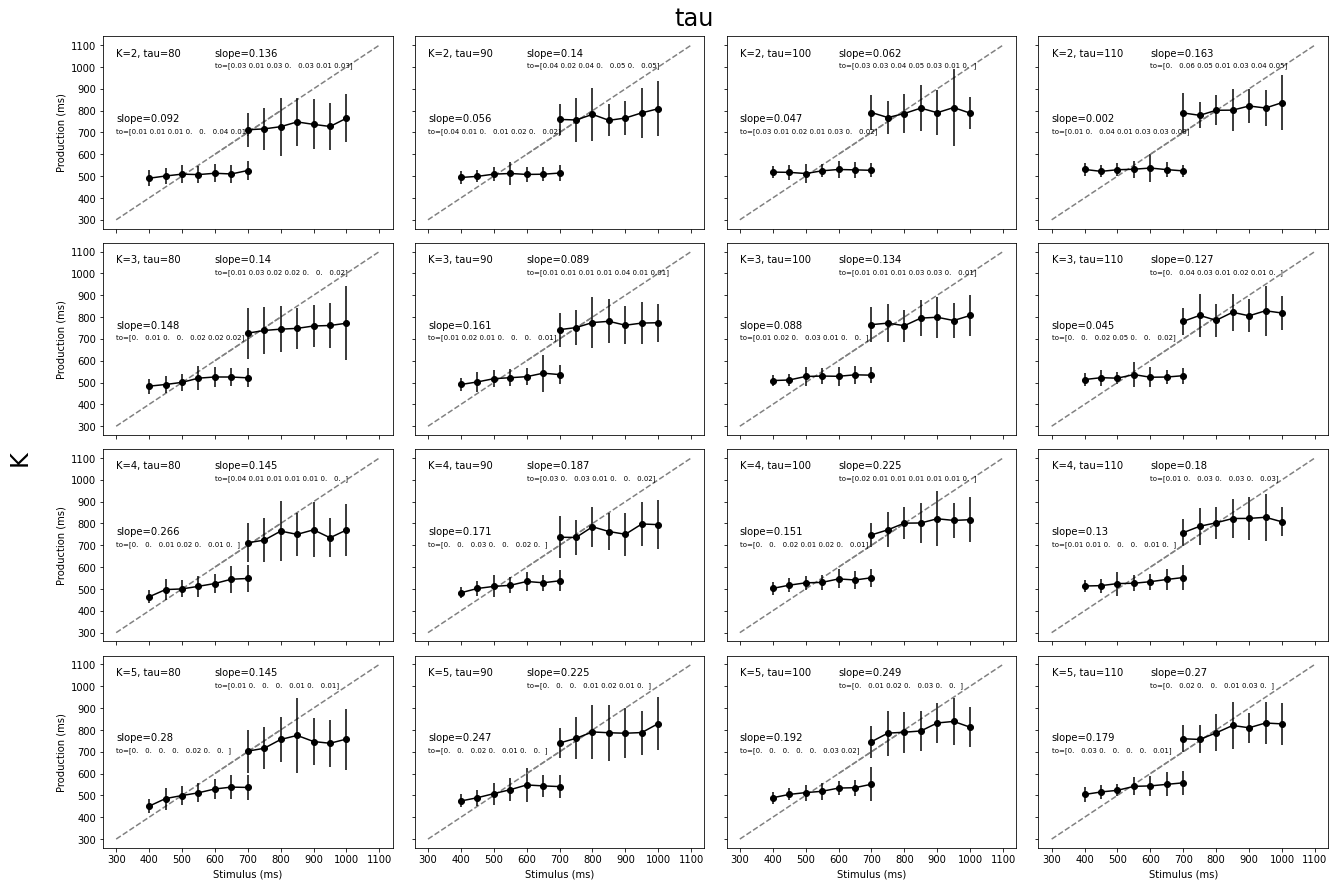

In [38]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]


K_lst =[2,3,4,5]
tau=[80,90, 100, 110]
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)


i = 0
for K in K_lst:
    for t in tau:

        params = Params(ntrials=500, delay=700, tau=t, th=0.8)
        expsim = ExperimentSimulation(params)
        
        stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
        exp_result1 = expsim.simulate(stimulus_lst1, K)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
        exp_result2 = expsim.simulate(stimulus_lst2, K)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+50, 'K='+str(K)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

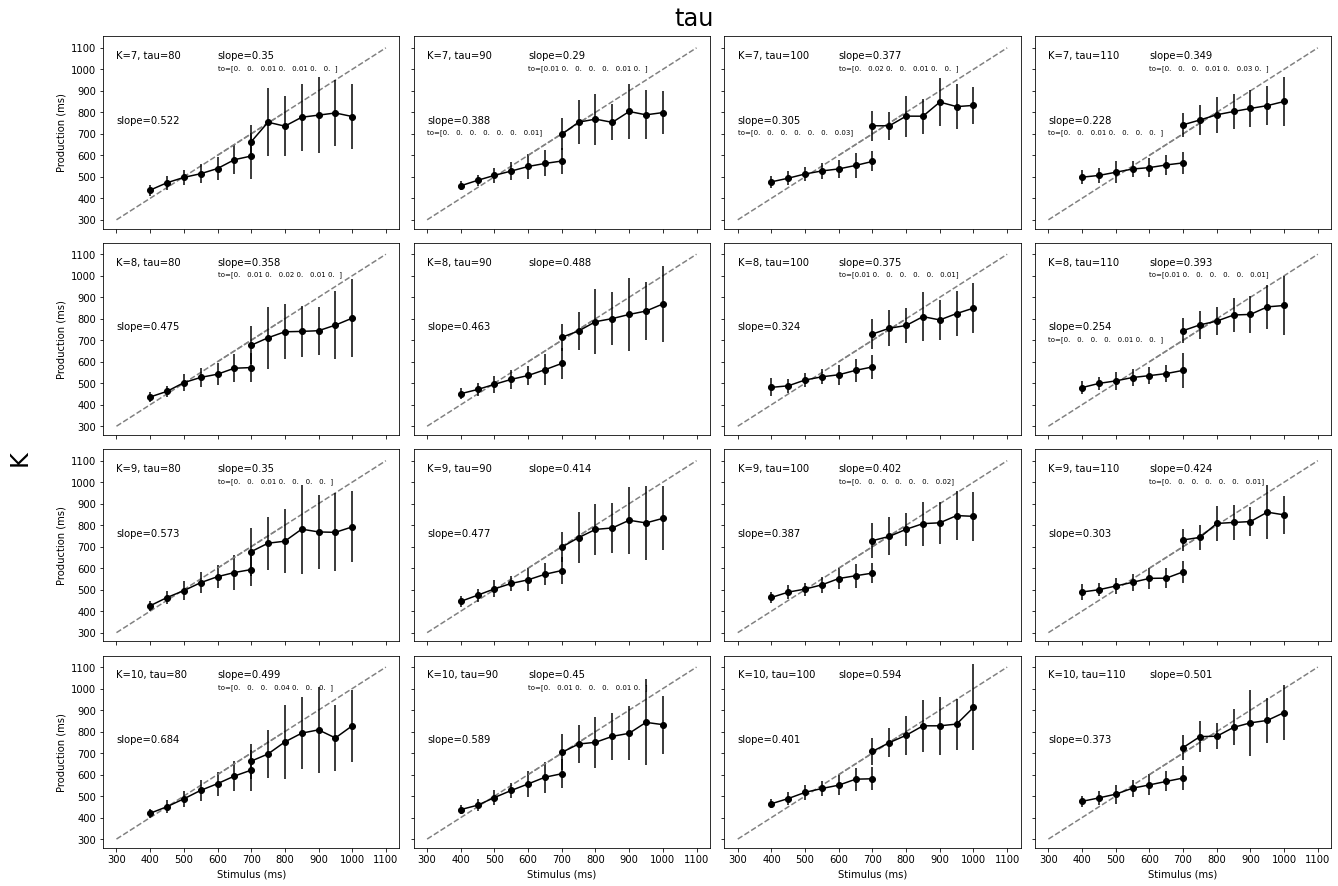

In [40]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]


K_lst =[7,8,9,10]
tau=[80,90, 100, 110]
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)


i = 0
for K in K_lst:
    for t in tau:

        params = Params(ntrials=500, delay=700, tau=t, th=0.8)
        expsim = ExperimentSimulation(params)
        
        stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
        exp_result1 = expsim.simulate(stimulus_lst1, K)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
        exp_result2 = expsim.simulate(stimulus_lst2, K)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+50, 'K='+str(K)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

# K & delay with $\tau$= 85, th=0.8

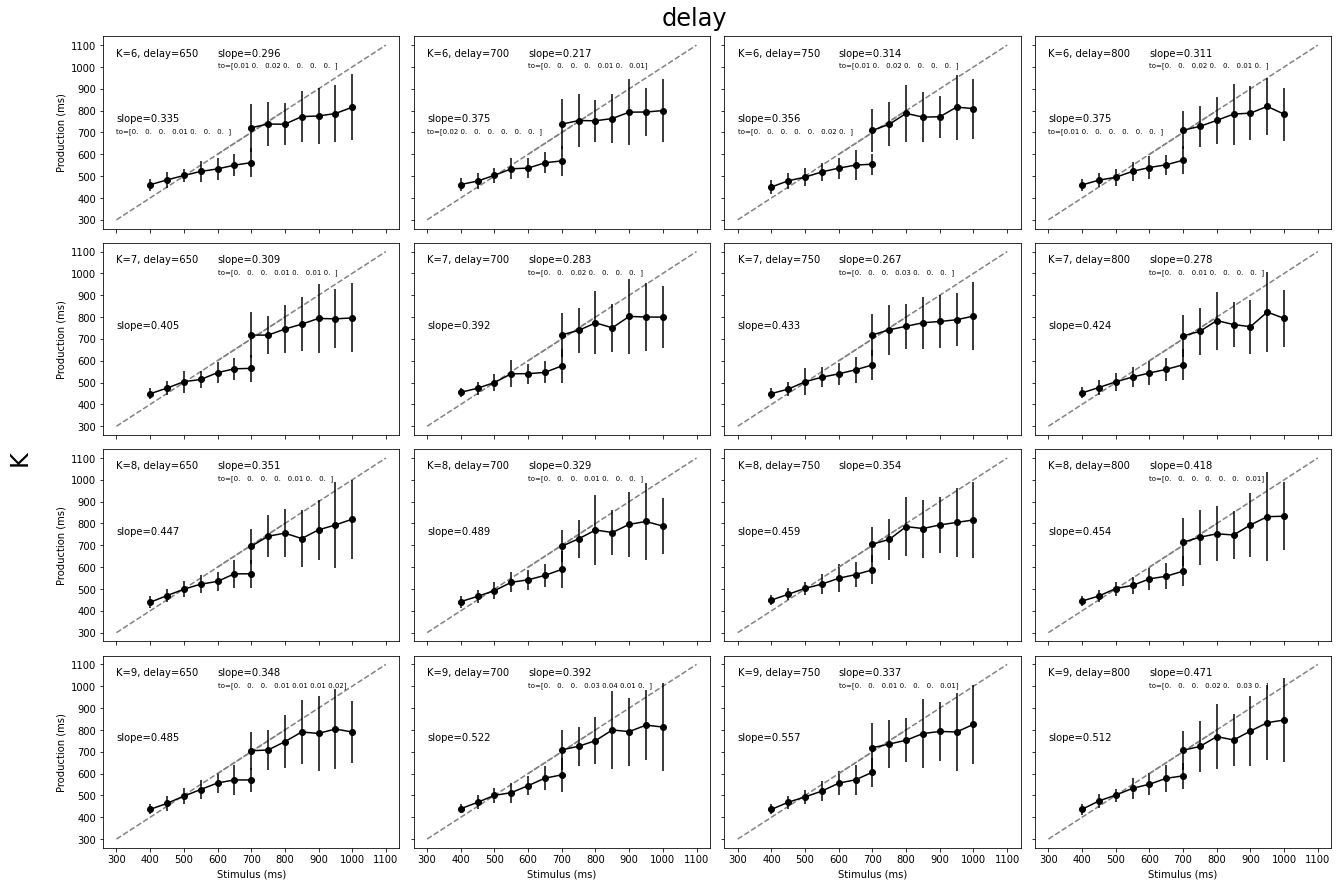

In [30]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]


K_lst =[6, 7, 8, 9]
delay = [650, 700, 750, 800]
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)



i = 0
for K in K_lst:
    for d in delay:

        params = Params(ntrials=500, delay=d, tau=85, th=0.8)
        expsim = ExperimentSimulation(params)
        
        stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
        exp_result1 = expsim.simulate(stimulus_lst1, K)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
        exp_result2 = expsim.simulate(stimulus_lst2, K)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+50, 'K='+str(K)+', delay='+str(d))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'delay', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

In [ ]:
# $\tau$ & delay with th=0.8

late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing


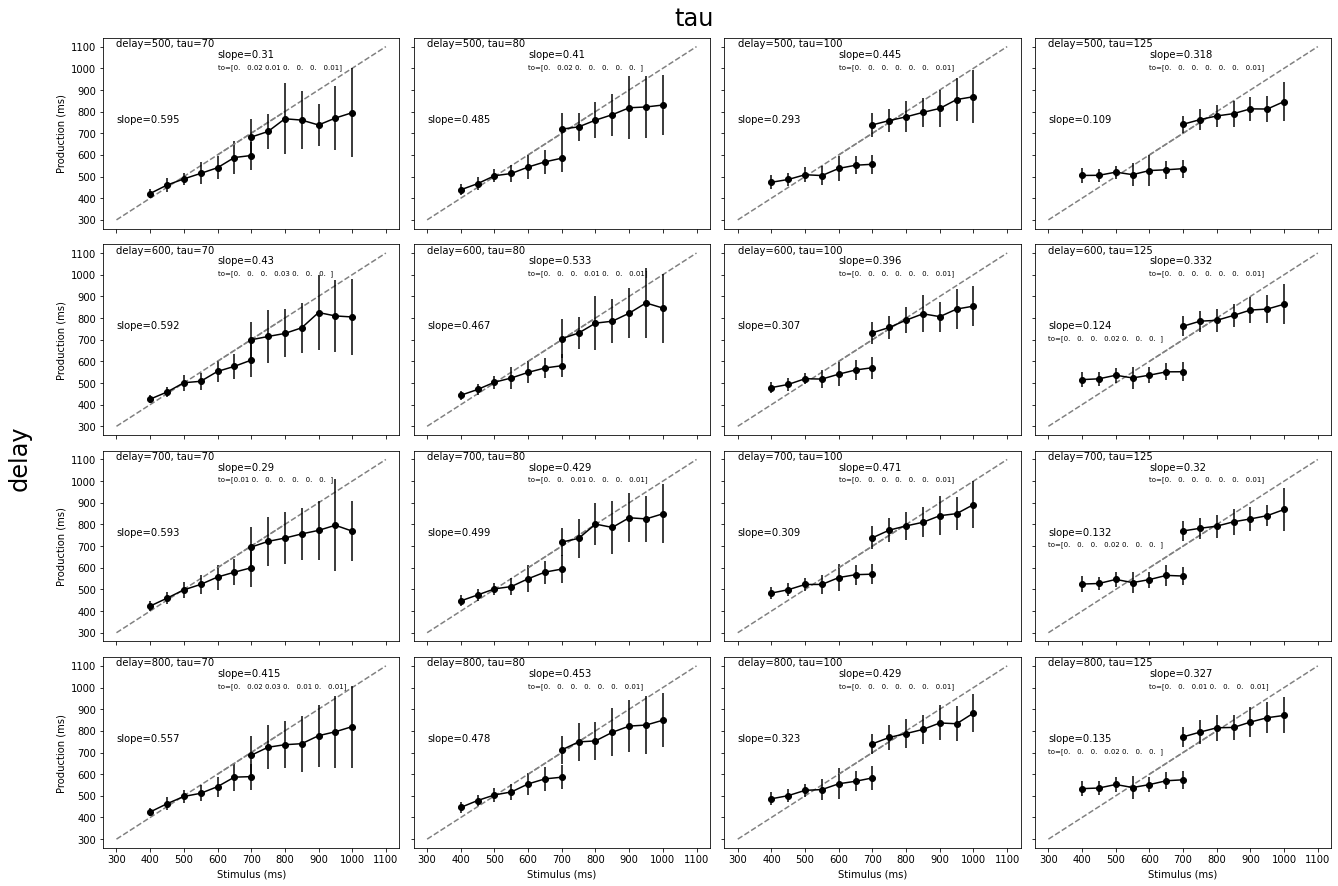

In [40]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

K = 4
delay_lst = [500,600,700,800]
tau=[70,80,100,125]
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for delay in delay_lst:
    for t in tau:
        params = Params(ntrials=500, delay=delay, tau=t, th=0.8)
        expsim = ExperimentSimulation(params)
        
        exp_result1 = expsim.simulate(stimulus_lst1, K)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])

        exp_result2 = expsim.simulate(stimulus_lst2, K)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'delay='+str(delay)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'delay', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing
late timeout no crossing


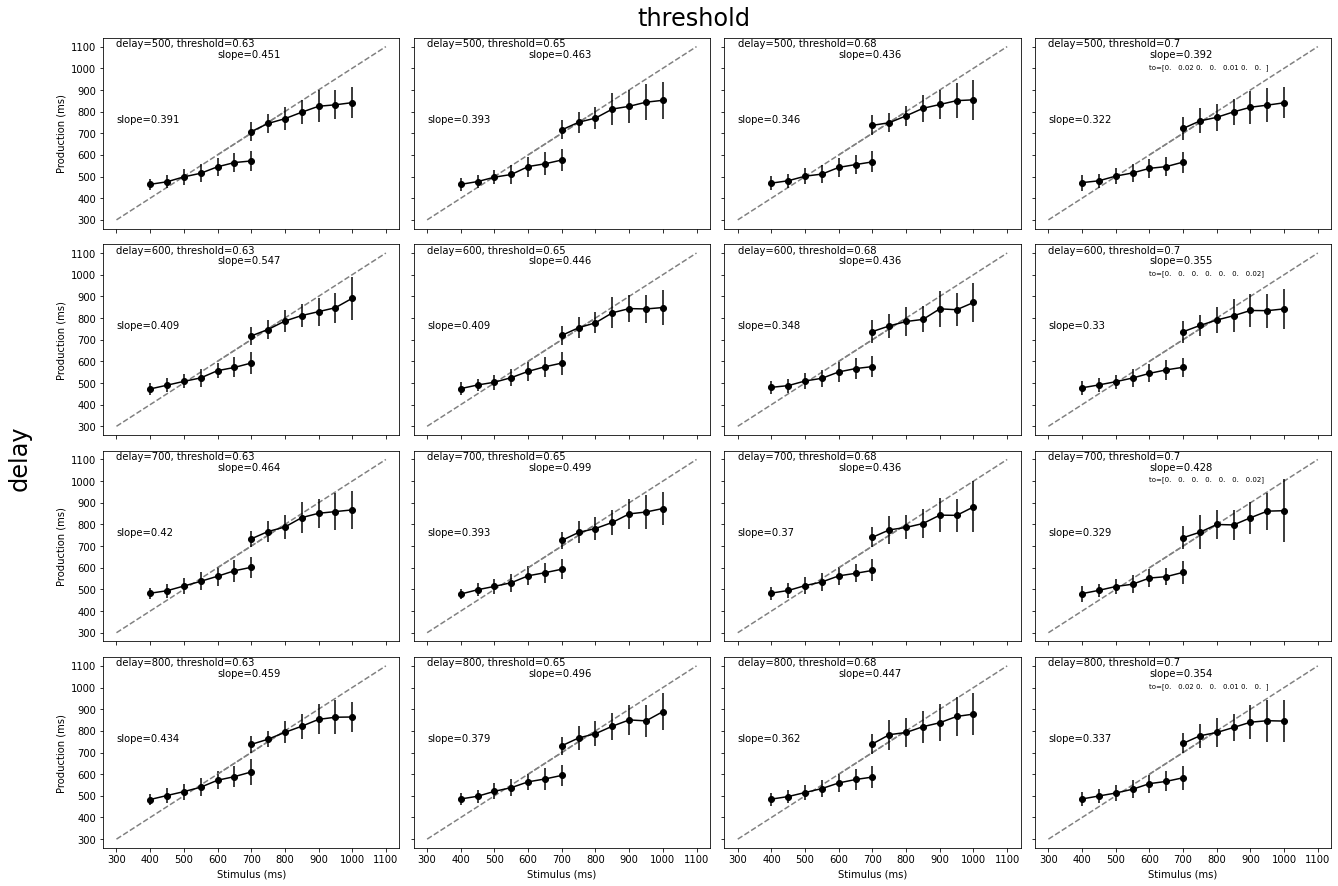

In [41]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

K = 4
th_lst = [0.63, 0.65,0.68,0.7]
delay_lst = [500,600,700,800]
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for delay in delay_lst:
    for t in th_lst:
        params = Params(ntrials=500, delay=delay, tau=100, th=t)
        expsim = ExperimentSimulation(params)
        
        exp_result1 = expsim.simulate(stimulus_lst1, K)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])

        exp_result2 = expsim.simulate(stimulus_lst2, K)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'delay='+str(delay)+', threshold='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'threshold', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'delay', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

# High I regime

In [4]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

Timeouts 0


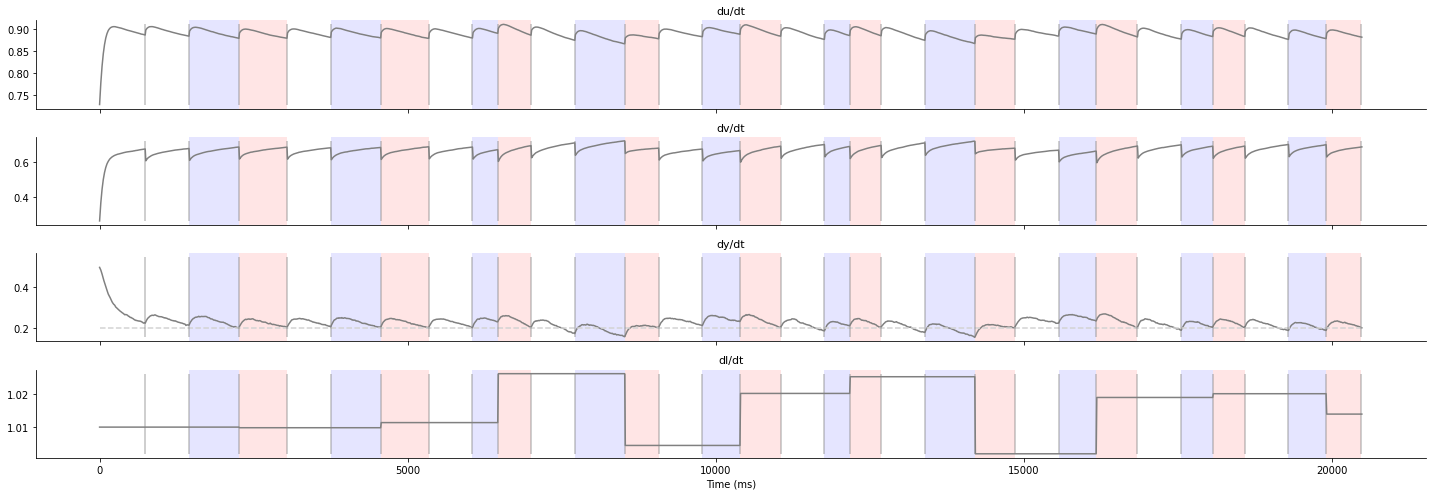

In [19]:
params = Params.from_dict({**PARAMS_DICT, 'Iinit': 1.01, 'ntrials': 10, 'tau': 100, 'th':0.2, 'delay':700, 'sigma': 0.01, 'IF':-500})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K)

alpha = 1
# plot = SimulationPlot(exp_result.create_simulation_plot_data())
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

Timeouts 0


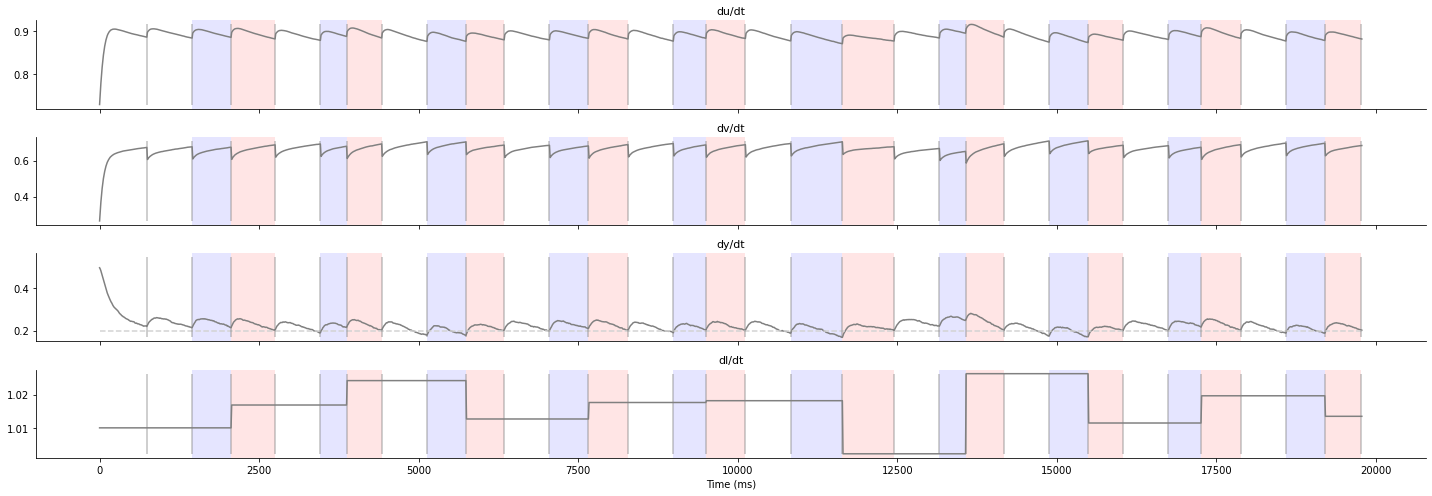

In [22]:
params = Params.from_dict({**PARAMS_DICT, 'Iinit': 1.01, 'ntrials': 10, 'tau': 100, 'th':0.2, 'delay':700, 'sigma': 0.01, 'IF':-50})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K)

alpha = 1
# plot = SimulationPlot(exp_result.create_simulation_plot_data())
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()